## Loan Application Status Prediction

### Data Description

- We have been provided a dataset to identify the customers that are eligible for loan amounts. It has 614 rows and 13 columns.

### Objective

- We need to predict our target variable 'Loan Status' that describes if the customers are eligible for loan amounts. 
- WE need to find if loan is approved or not(Yes or No). It is binary classification

### Importing the Libraries

In [1]:
# Numerical libraries
import numpy as np  
import pandas as pd  # to handle data in form of rows and columns   
import matplotlib.pyplot as plt   # importing ploting libraries
import matplotlib.style
from matplotlib import pyplot
%matplotlib inline   
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

### Importing the Dataset

In [2]:
# reading the CSV file into pandas dataframe
df=pd.read_csv(r'C:\Users\Dell\Documents\loan_prediction.csv') 

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Exploratory Data Analysis

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- We find that the target variable,'Loan_Status' is object type. Hence it is classification. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- From the above info, we find that there are few non null data in some of the columns. 
- Using info, we get a short summary of loan application dataframe is made. It prints information about index dtype, column dtype, non null values and memory usage.

#### Checking for duplicates

In [9]:
duplicate=df[df.duplicated()]
print('Duplicate Rows:')
duplicate

Duplicate Rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


- There are no duplicate rows in the dataframe.

### Checking for null values

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- We find that there are few null values in some of the columns.

#### Treating the null values - Imputation

In [11]:
#Imputing the missing values
#Filling categorical columns null values with mode and numerical columns null values with mean

for data in [df]:
    data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
    data['Married']=data['Married'].fillna(data['Married'].mode()[0])
    data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
    data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
    data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
    data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
    data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#Checking numerical status of the dataset

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- Applicant Income minimum is 150 and maximum is 81000 and has an average of 5403
- Co applicant average income is 1621

- There are outliers expected in ApplicantIncome column as the values till 75% are gradually increased. But after 75%, max value is drastically varied. Same is the case with Coapplicant Income and Loan Amount as well.


In [14]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [15]:
df['Credit_History']=df['Credit_History'].astype(object)

In [16]:
cat_fea=[col for col in df.columns if df[col].dtype==object]
num_fea=[col for col in df.columns if df[col].dtype!=object]

### Univariate Analysis

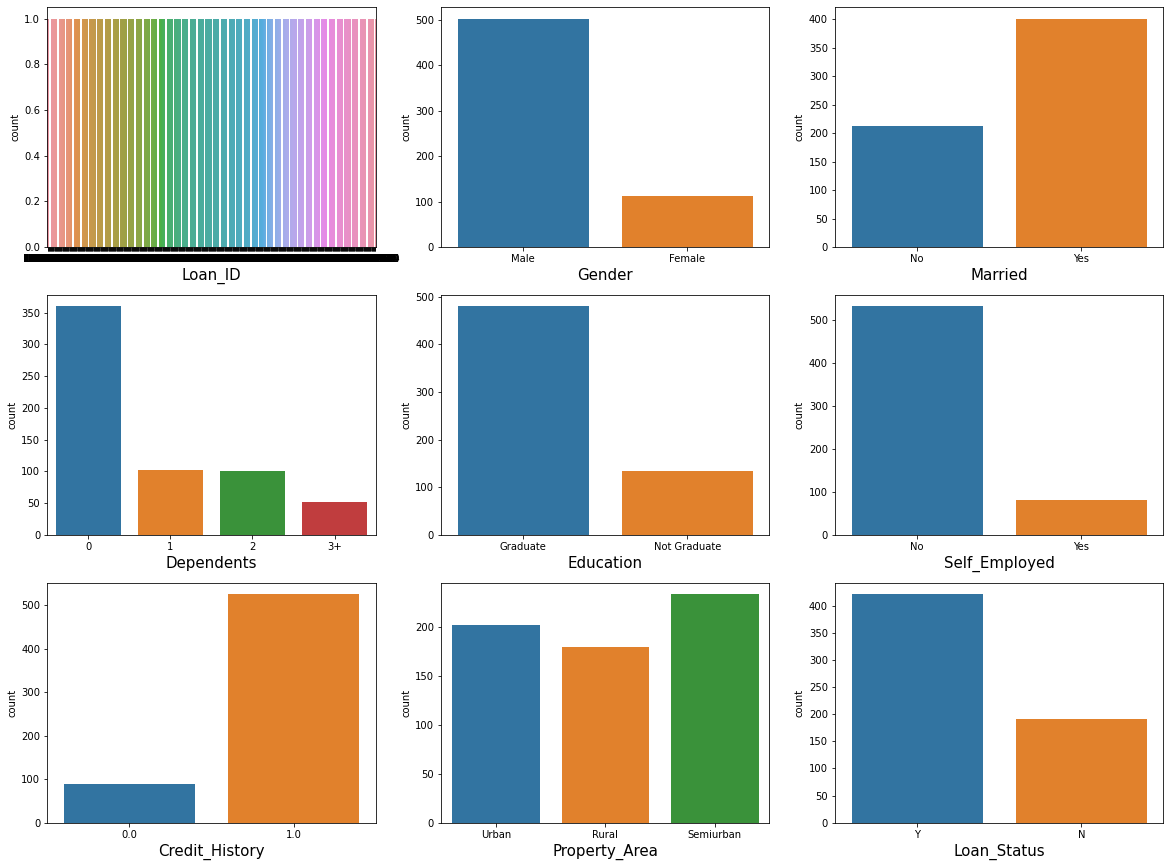

In [17]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in cat_fea:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

- Male applicants are more than female applicants 
- Married applicants are more than the non-married
- The applicants with dependents=0 is maximum
- Graduate applicants are more than non-graduate applicants
- Self employed are less than the non-self-employed
- Credit History is there for many of the applicants
- Maximum property areas are located in Semiurban areas
- Most of the loans are approved than the loans that were rejected.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

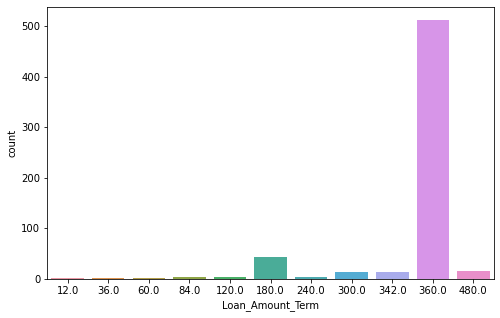

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(df['Loan_Amount_Term'])

- Majority of the loans are taken for the period of 360 months i.e.,30 years.

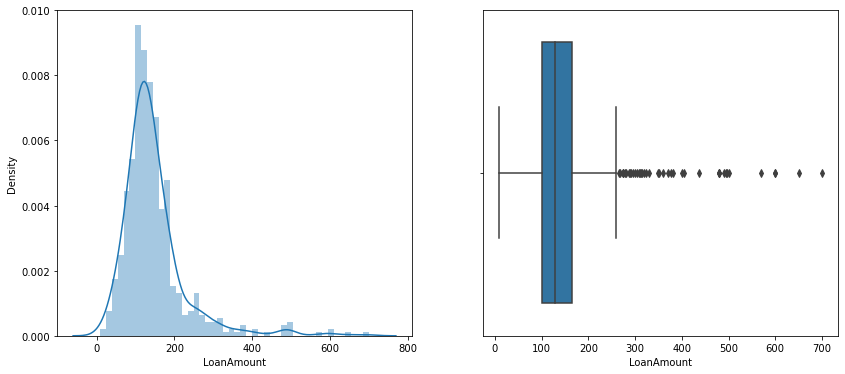

In [19]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6)) 
sns.distplot(df['LoanAmount'],ax=ax[0])
sns.boxplot(df['LoanAmount'],ax=ax[1])
plt.show()

- The distribution curve of LoanAmount is fairly normal and we also notice that there are lot of outliers

### Bivariate Analysis

In [20]:
#Defining a function for plotting kde plot
def kdeplot(param, column):
    
    ax = sns.kdeplot(param[(df["Loan_Status"] == 'N') ],
                color="Red", shade = True);
    ax = sns.kdeplot(param[(df["Loan_Status"] == 'Y') ],
                ax =ax, color="Blue", shade= True);
    ax.legend(["Not approved","approved"],loc='upper right');
    ax.set_ylabel('Density');
    ax.set_xlabel(column);
    ax.set_title("Distribution of " + column +" by loan approval status");

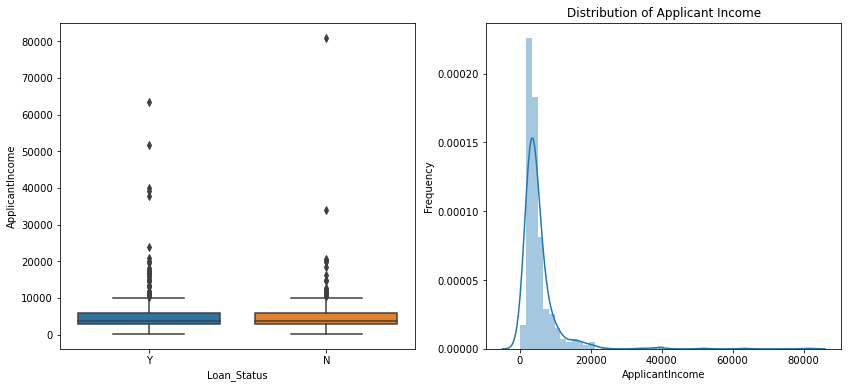

In [21]:
# we are checking the distribution of applicant income and its related to loan status

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Loan_Status", y ="ApplicantIncome" , data=df, ax=ax[0])
    
#distribution plot
ax[1].set_title("Distribution of Applicant Income")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['ApplicantIncome'], ax=ax[1], kde=True)
    
plt.show()

- It is inferred that most of the data in the distribution of applicant income is towards left which means that the data is not normally distributed
- Mean applicant income of loan status is almost same

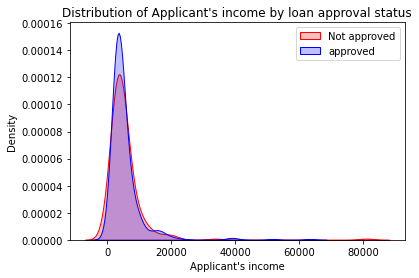

In [22]:
kdeplot(df.ApplicantIncome, "Applicant's income")

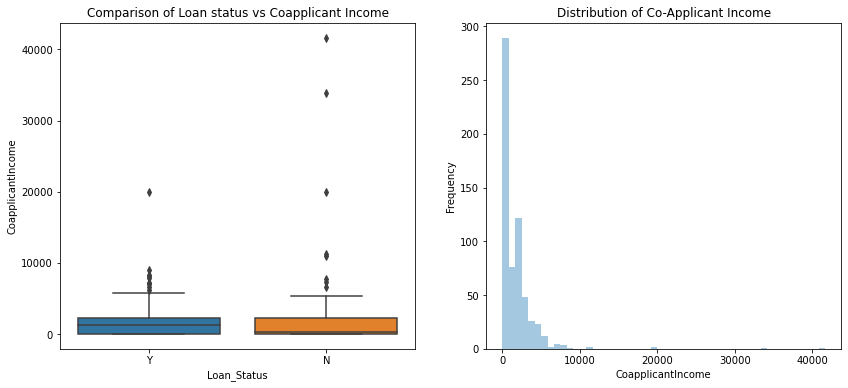

In [23]:
# we are checking the distribution of co-applicant income and its related to loan status

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Loan_Status", y ="CoapplicantIncome" , data=df, ax=ax[0])
ax[0].set_title("Comparison of Loan status vs Coapplicant Income")
    
#distribution plot
ax[1].set_title("Distribution of Co-Applicant Income")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['CoapplicantIncome'], ax=ax[1], kde=False)
    
plt.show()

- Mean co-applicant Income of Yes or No are almost same
- co-applicant income distribution curve is right skewed.

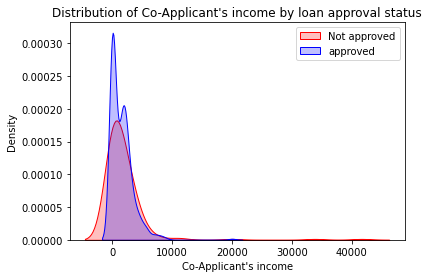

In [24]:
kdeplot(df.CoapplicantIncome, "Co-Applicant's income")

Text(0.5, 0.98, '')

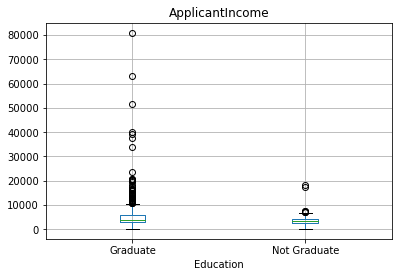

In [25]:
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

- We can see that there are higher number of graduates with higher income appearing as outliers

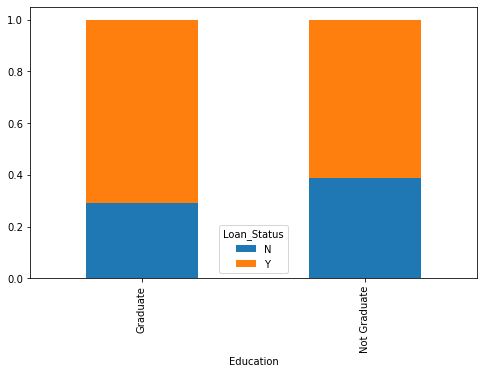

In [26]:
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
plt.show()

- We find that the non-graduate applicants have got more rejection for the loans than the graduate applicants

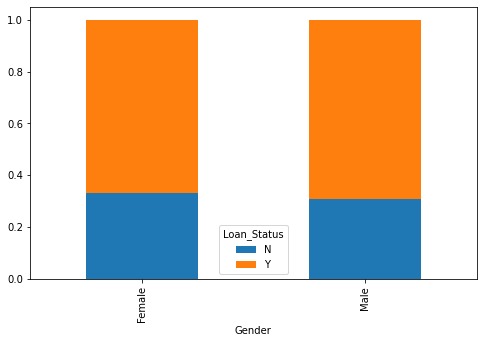

In [27]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
plt.show()

- We can infer from the above stacked bar chart that the number of male and female applicants is same for both the approved and rejected loans.

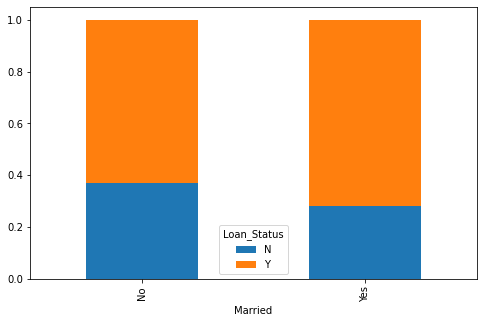

In [28]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
plt.show()

- We can infer from the above stacked bar chart that the number of unmarried applicants have got more rejection than the applicants who were married

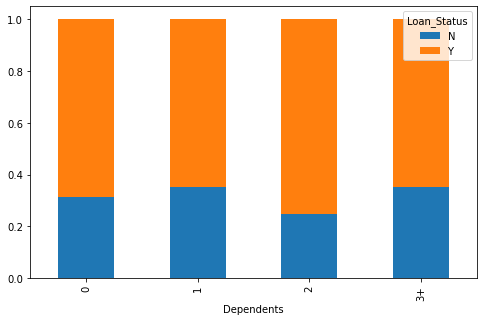

In [29]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
plt.show()

- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

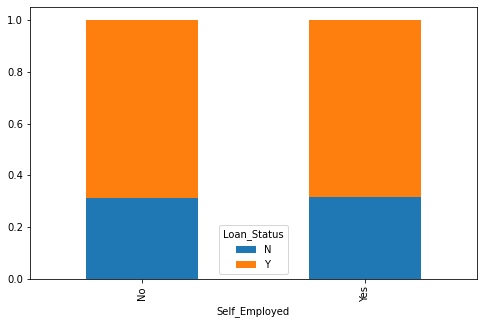

In [30]:
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
plt.show()

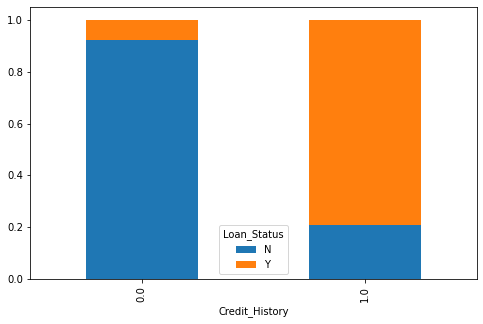

In [31]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,5))
plt.show()

- It seems that the people with credit history 1 are more likely to get their loans approved

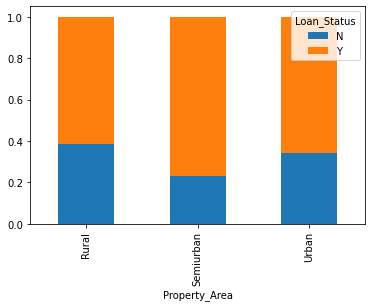

In [32]:
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

- The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

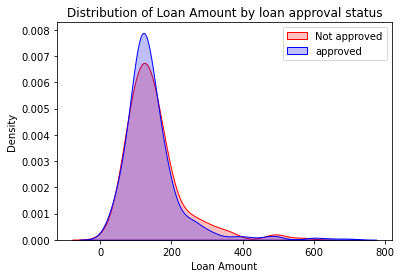

In [33]:
kdeplot(df.LoanAmount, "Loan Amount")

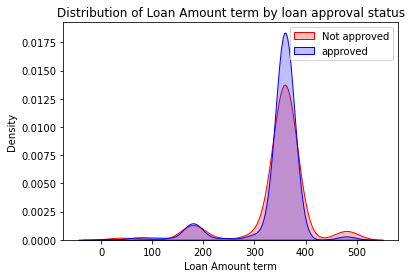

In [34]:
kdeplot(df.Loan_Amount_Term, "Loan Amount term")

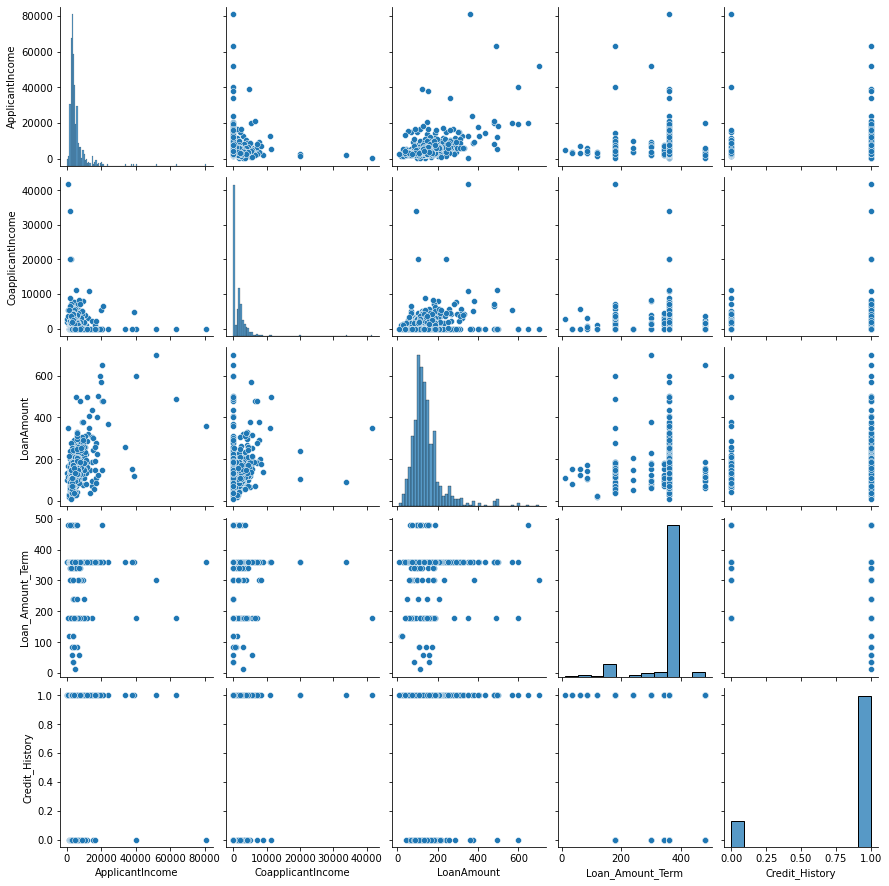

In [35]:
sns.pairplot(df)
plt.show()

ApplicantIncome         AxesSubplot(0.125,0.536818;0.227941x0.343182)
CoapplicantIncome    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
LoanAmount           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Loan_Amount_Term           AxesSubplot(0.125,0.125;0.227941x0.343182)
Credit_History          AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

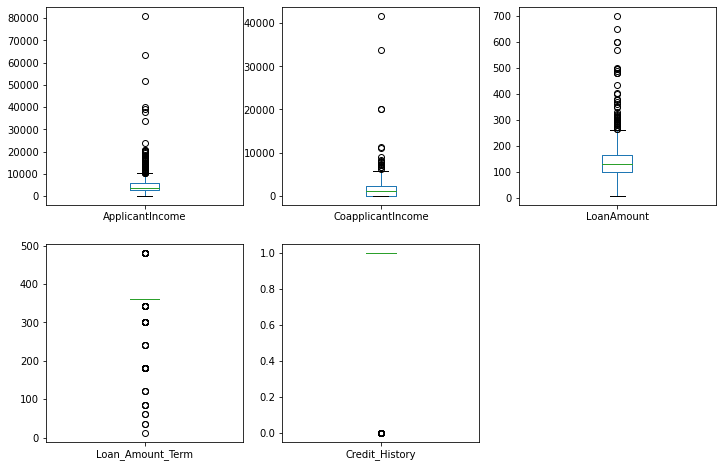

In [36]:
#checking the outliers

df.plot(kind='box',subplots=True,figsize=(12,8),layout=(2,3))

In [37]:
df1=df.copy()
df1.shape

(614, 13)

##### Outlier Treatment

<AxesSubplot:>

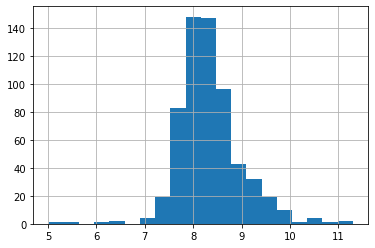

In [38]:
df['AI_log']=np.log(df['ApplicantIncome'])
df['AI_log'].hist(bins=20)

<AxesSubplot:>

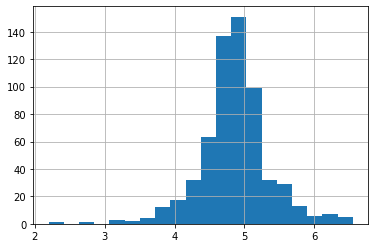

In [39]:
df['LA_log']=np.log(df['LoanAmount'])
df['LA_log'].hist(bins=20)

In [40]:
df.shape

(614, 15)

In [41]:
#Converting the categorical columns into numerical by encoding techniques
# We are using 'label encoder' here

from sklearn import preprocessing
le=preprocessing.LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Dependents"]=le.fit_transform(df["Dependents"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

df.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,AI_log,LA_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,8.674026,4.986426
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,8.430109,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,8.006368,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,7.856707,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,8.699515,4.948760


<AxesSubplot:>

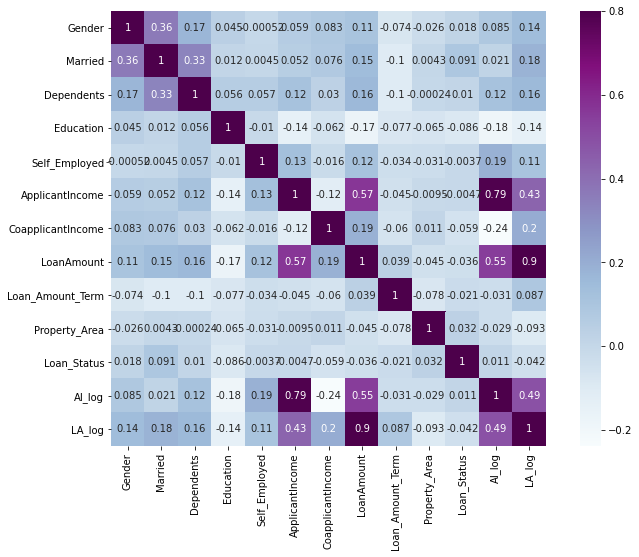

In [42]:
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),vmax=.8,square=True,cmap="BuPu", annot = True)

- We see that the most correlate variables are ApplicantIncome - LoanAmount

## Feature Importance

- To create best predictive model we need to understand the available data
- It is important to understand the variables and how much they are contributing towards the target variable
- So that we can remove unnecessary variables to improve model performance
- To understand the importance of data we use ML classifiers and plot bar graph to describe importance


In [43]:
#Splitting the data into x variable and y target variable

x = df.drop(["Loan_Status","Loan_ID"],axis=1)
y = df["Loan_Status"]

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42,test_size=0.20)


In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
#Classifiers
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV 
from xgboost import plot_importance

from sklearn.metrics import classification_report


Feature importance by Random Forest

Feature importance by Decision Tree

Feature importance by Suppoprt Vector Machine

Feature importance by Logistic Regression



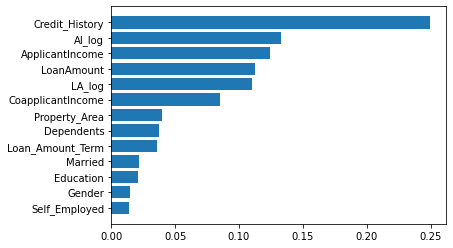

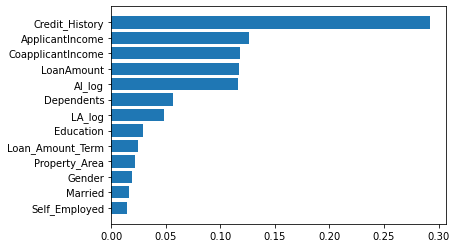

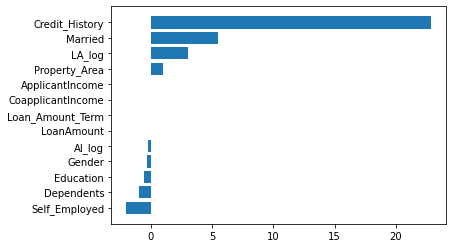

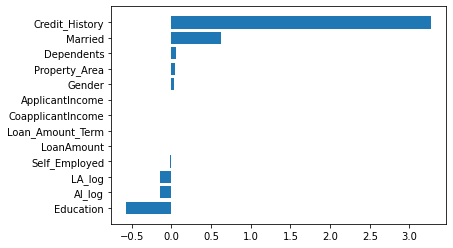

In [47]:
print("Feature importance by Random Forest")
print()
RF = RandomForestClassifier()
RF.fit(x,y)
features = RF.feature_importances_
indices=np.argsort(features)

fig,ax=plt.subplots()
ax.barh(range(len(features)),features[indices])
ax.set_yticks(range(len(features)))
_=ax.set_yticklabels(np.array(x_train.columns)[indices])


print("Feature importance by Decision Tree")
print()
DT = DecisionTreeClassifier()
DT.fit(x,y)
features = DT.feature_importances_
indices=np.argsort(features)

fig,ax=plt.subplots()
ax.barh(range(len(features)),features[indices])
ax.set_yticks(range(len(features)))
_=ax.set_yticklabels(np.array(x_train.columns)[indices])

print("Feature importance by Suppoprt Vector Machine")
print()
SVM = SVC(kernel="linear")
SVM.fit(x,y)
features = SVM.coef_[0]
indices=np.argsort(features)

fig,ax=plt.subplots()
ax.barh(range(len(features)),features[indices])
ax.set_yticks(range(len(features)))
_=ax.set_yticklabels(np.array(x_train.columns)[indices])


print("Feature importance by Logistic Regression")
print()
LR = LogisticRegression()
LR.fit(x,y)
features = LR.coef_[0]
indices=np.argsort(features)

fig,ax=plt.subplots()
ax.barh(range(len(features)),features[indices])
ax.set_yticks(range(len(features)))
_=ax.set_yticklabels(np.array(x_train.columns)[indices])



- From the feature importance we find that 'Credit History','Applicant Income','Coapplicant income' and 'Loan amount' are the most important features from the four models

## Building the models

### Standardising the data

- Data standardization is done by Standard-Scaler which scales the data so that Mean of observed data is 0 and Standard Deviation is 1.
- As our data is not much normally distributed we will choose Standardization using Standard-Scaler aiming that it will reduce more skewness and contribute in accuracy gain.

In [48]:
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x_scaler,y, random_state=42,test_size=0.20)

In [50]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:",accuracy_score(y_pred,y_test))


knn = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:",accuracy_score(y_pred,y_test))


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:",accuracy_score(y_pred,y_test))


rf = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:",accuracy_score(y_pred,y_test))


ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:",accuracy_score(y_pred,y_test))


gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:",accuracy_score(y_pred,y_test))


SVM = SVC(kernel="linear")
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:",accuracy_score(y_pred,y_test))


XGB = XGBClassifier()
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:",accuracy_score(y_pred,y_test))


gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123

Logistic Regression: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        18
           1       1.00      0.76      0.86       105

    accuracy                           0.80       123
   macro avg       0.71      0.88      0.73       123
weighted avg       0.91      0.80      0.82       123

KNeighborsClassifier: 0.7967479674796748
              precision    recall  f1-score   support

           0       0.51      0.56      0.54        39
           1       0.79      0.75      0.77        84

    accuracy                           0.69       123
   macro avg       0.65      0.66      0.65    

- By scaling the data and building the models, we find that the accuracy is highest for kneighbor classifier i.e.,79.6%

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix ,f1_score
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_score,roc_curve

###### ** Now Building the models by dropping the features which are less important and keeping the features as per importance analysis **

No handles with labels found to put in legend.


**************************************************LOGISTIC REGRESSION **************************************************
              precision    recall  f1-score   support

           0       0.47      0.91      0.62        22
           1       0.98      0.83      0.90       132

    accuracy                           0.84       154
   macro avg       0.72      0.87      0.76       154
weighted avg       0.91      0.84      0.86       154

confusion matrix 
 [[ 20  23]
 [  2 109]]
Logistic Regression: 0.8376623376623377


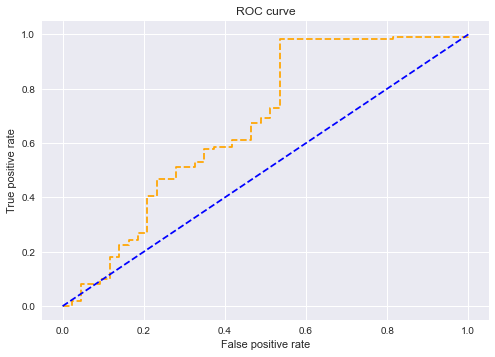

**************************************************K NEIGHBORS CLASSIFIER**************************************************
              precision    recall  f1-score   support

           0       0.44      0.86      0.58        22
           1       0.97      0.82      0.89       132

    accuracy                           0.82       154
   macro avg       0.71      0.84      0.74       154
weighted avg       0.90      0.82      0.85       154


No handles with labels found to put in legend.



confusion matrix 
 [[ 19  24]
 [  3 108]]
KNeighborsClassifier: 0.8246753246753247


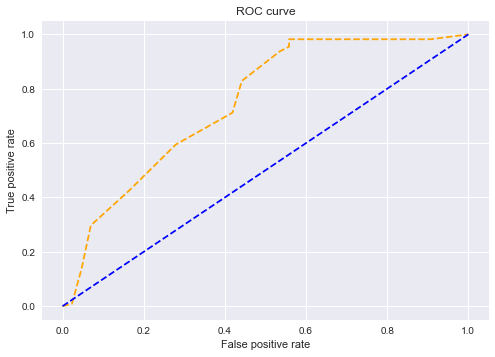

**************************************************DECISION TREE CLASSIFIER**************************************************


No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.60      0.43      0.50        61
           1       0.68      0.82      0.75        93

    accuracy                           0.66       154
   macro avg       0.64      0.62      0.62       154
weighted avg       0.65      0.66      0.65       154

confusion matrix 
 [[26 17]
 [35 76]]
DecisionTreeClassifier: 0.6623376623376623


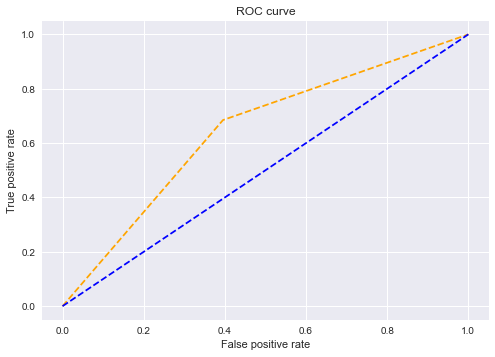

**************************************************RANDOM FOREST CLASSIFIER **************************************************
              precision    recall  f1-score   support

           0       0.47      0.69      0.56        29
           1       0.92      0.82      0.86       125

    accuracy                           0.79       154
   macro avg       0.69      0.75      0.71       154
weighted avg       0.83      0.79      0.81       154

confusion matrix 
 [[ 20  23]
 [  9 102]]
RandomForestClassifier: 0.7922077922077922


No handles with labels found to put in legend.


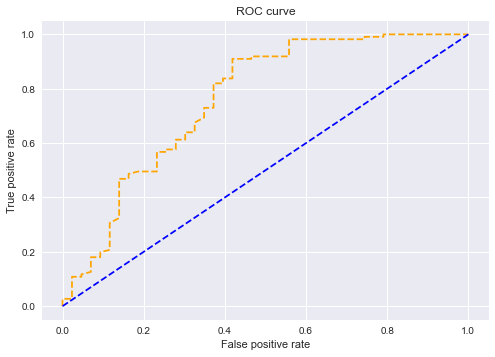

No handles with labels found to put in legend.


**************************************************ADA BOOST CLASSIFIER **************************************************
              precision    recall  f1-score   support

           0       0.51      0.85      0.64        26
           1       0.96      0.84      0.90       128

    accuracy                           0.84       154
   macro avg       0.74      0.84      0.77       154
weighted avg       0.89      0.84      0.85       154

confusion matrix 
 [[ 22  21]
 [  4 107]]
AdaBoostClassifier: 0.8376623376623377


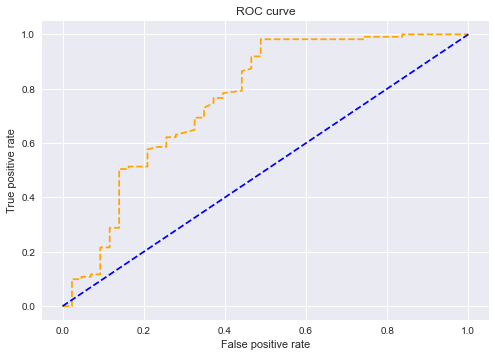

No handles with labels found to put in legend.


**************************************************GRADIENT BOOSTING**************************************************
              precision    recall  f1-score   support

           0       0.49      0.60      0.54        35
           1       0.87      0.82      0.84       119

    accuracy                           0.77       154
   macro avg       0.68      0.71      0.69       154
weighted avg       0.79      0.77      0.77       154

confusion matrix 
 [[21 22]
 [14 97]]
GradientBoostingClassifier: 0.7662337662337663


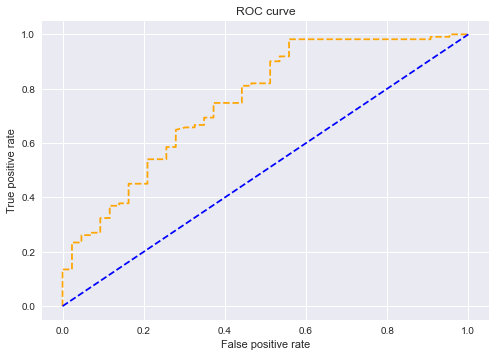

**************************************************SUPPORT VECTOR CLASSIFIER**************************************************
              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

confusion matrix 
 [[ 19  24]
 [  2 109]]
SVM: 0.8311688311688312
**************************************************XGB**************************************************
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        48
           1       0.78      0.82      0.80       106

    accuracy                           0.72       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.71      0.72      0.72       154

confusion matrix 
 [[24 19]
 [24 87]]
XGBoost: 0.7

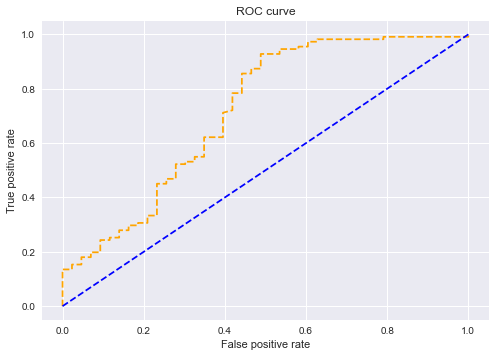

No handles with labels found to put in legend.


**************************************************GAUSSIAN NB**************************************************
              precision    recall  f1-score   support

           0       0.47      0.83      0.60        24
           1       0.96      0.82      0.89       130

    accuracy                           0.82       154
   macro avg       0.71      0.83      0.74       154
weighted avg       0.89      0.82      0.84       154

confusion matrix 
 [[ 20  23]
 [  4 107]]
GaussianNB: 0.8246753246753247


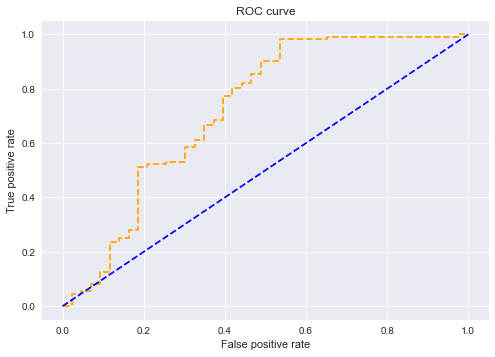

In [64]:
X = df.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)
y = df.Loan_Status
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->
print('*'*50+'LOGISTIC REGRESSION '+'*'*50)
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

Lr = LogisticRegression()
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("Logistic Regression:",accuracy_score(y_pred,y_test))
      
pred_prob=Lr.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'K NEIGHBORS CLASSIFIER'+"*"*50)
knn = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("KNeighborsClassifier:",accuracy_score(y_pred,y_test))
      
pred_prob=knn.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'DECISION TREE CLASSIFIER'+"*"*50)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("DecisionTreeClassifier:",accuracy_score(y_pred,y_test))
      
pred_prob=dt.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'RANDOM FOREST CLASSIFIER '+"*"*50)
rf = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("RandomForestClassifier:",accuracy_score(y_pred,y_test))
      
pred_prob=rf.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()
      
      
print('*'*50+'ADA BOOST CLASSIFIER '+"*"*50)
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("AdaBoostClassifier:",accuracy_score(y_pred,y_test))
      
pred_prob=ab.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'GRADIENT BOOSTING'+'*'*50)
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("GradientBoostingClassifier:",accuracy_score(y_pred,y_test))
      
pred_prob=gb.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'SUPPORT VECTOR CLASSIFIER'+'*'*50)
SVM = SVC(kernel="linear")
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("SVM:",accuracy_score(y_pred,y_test))


print('*'*50+'XGB'+'*'*50)
XGB = XGBClassifier()
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("XGBoost:",accuracy_score(y_pred,y_test))
      
pred_prob=XGB.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


      
print('*'*50+'GAUSSIAN NB'+'*'*50)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_pred,y_test))
cm = confusion_matrix(y_test , y_pred )
print('confusion matrix \n',  cm)
print("GaussianNB:",accuracy_score(y_pred,y_test))
      
pred_prob=gnb.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('seaborn')
    
plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


- After dropping the unnecessary features we find that the accuracy is highest for Logistic regression model i.e.,83.7%

### Hyperparameter Tuning

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [55]:
X = df.drop(["Loan_Status","Loan_ID"],axis=1)
y = df.Loan_Status

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [56]:
#Hyperparameters tuning for Logistic regression

LR_T=LogisticRegression()
#define parameters
solvers=['newton-cg','lbfgs','liblinear']
penalty=['l1','l2']
c_values=[100,10,1.0,0.1,0.01]

#define grid search
grid=dict(solver=solvers,penalty=penalty,C=c_values)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=LR_T,param_grid=grid,n_jobs=-1,cv=cv)
grid_result=grid_search.fit(X,y)
grid_result.best_params_



{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [57]:
LR_tuned= LogisticRegression(C=0.1,penalty='l1',solver='liblinear')
LR_tuned.fit(X_train, y_train)
y_pred = LR_tuned.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.47      0.91      0.62        22
           1       0.98      0.83      0.90       132

    accuracy                           0.84       154
   macro avg       0.72      0.87      0.76       154
weighted avg       0.91      0.84      0.86       154

Logistic Regression: 0.8376623376623377


- After tuning the logistic regression model accuracy has not changed. It is 83.76%

In [58]:
#Hyperparameters tuning for K Neighbor Classifier

KNN_T=KNeighborsClassifier()

#define parameters
n_neighbors=range(1,21,2)
weights=['uniform','distance']
metric=['euclidean','manhattan','minkowski']

#define grid search
grid=dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=KNN_T,param_grid=grid,n_jobs=-1,cv=cv)
grid_result=grid_search.fit(X,y)
grid_result.best_params_


{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [59]:
KNN_tuned = KNeighborsClassifier(metric='manhattan',n_neighbors=19,weights='uniform')
KNN_tuned.fit(X_train,y_train)
y_pred = KNN_tuned.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.05      0.33      0.08         6
           1       0.96      0.72      0.83       148

    accuracy                           0.71       154
   macro avg       0.51      0.53      0.45       154
weighted avg       0.93      0.71      0.80       154

KNeighborsClassifier: 0.7077922077922078


- After tuning the K Neigbor classifier model, the accuracy of the model has reduced from 82% to 70%

In [60]:
#Hyperparameters tuning for SVC

SVC_T=SVC()

#define parameters
kernel=['poly','rbf','sigmoid']
C=[50,10,1.0,0.1,0.01]
gamma=['scale']

#define grid search
grid=dict(kernel=kernel,C=C,gamma=gamma)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=SVC_T,param_grid=grid,n_jobs=-1,cv=cv)
grid_result=grid_search.fit(X,y)
grid_result.best_params_


{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}

In [61]:
SVC_tuned= SVC(kernel='poly',gamma='scale',C=0.01)
SVC_tuned.fit(X_train,y_train)
y_pred = SVC_tuned.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.02      1.00      0.05         1
           1       1.00      0.73      0.84       153

    accuracy                           0.73       154
   macro avg       0.51      0.86      0.44       154
weighted avg       0.99      0.73      0.84       154

SVM: 0.7272727272727273


- After tuning support vector model, the accuracy has reduced from 83% to 72%

- After scaling the data, by building the models, we find that the accuracy is highest for kneighbor classifier i.e.,79.6%
- By dropping the features which are less important and then scaling the data, we get the accuracy is highest for logistic regression i.e.,83.76%.
- After performing the tuning on Logistic regression, kneighbor classifier and Support vector we find that the accuracy has not improved.
- So, we conclude that the best fit model is the Logistic Regression model built after dropping the less important features.

### Saving the model

In [62]:
import pickle
filename = 'loanprediction.pkl'
pickle.dump(Lr, open(filename, 'wb'))

##### Conclusion

In [65]:
model=pickle.load(open('loanprediction.pkl','rb'))
result=model.score(X_test,y_test)
print(result*100)

83.76623376623377


In [66]:
conclusion=pd.DataFrame([model.predict(X_test)[:],y_pred[:]],index=['Predicted','Original'])

In [67]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Predicted,1,1,1,1,1,0,1,1,0,1,...,1,1,1,1,0,0,1,1,1,0
Original,1,1,1,1,1,0,1,1,0,1,...,1,1,1,0,0,0,1,1,1,0
